In [13]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos, pi

Задание 2: В папке находится изображение palm.png с пальмой. Используя классические аффинные преобразования, необходимо создать "тень" для этой пальмы и отрисовать ее с ней на одном рисунке. Пример результата находится в изображении palm_result.png

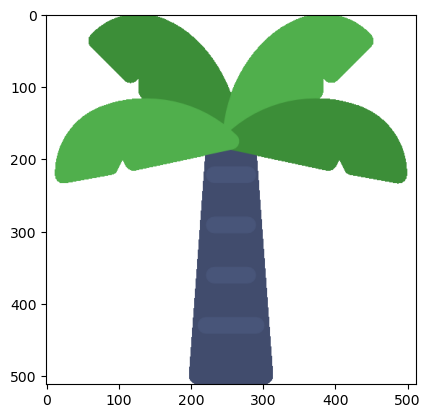

In [2]:
img = cv.imread('palm.png', cv.COLOR_BGR2RGB)
plt.imshow(img)

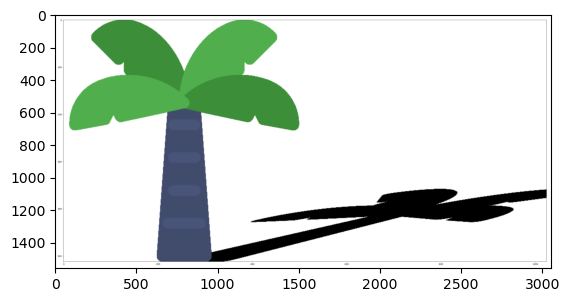

In [3]:
img_2 = cv.imread('palm_result.png', cv.COLOR_BGR2RGB)
plt.imshow(img_2)

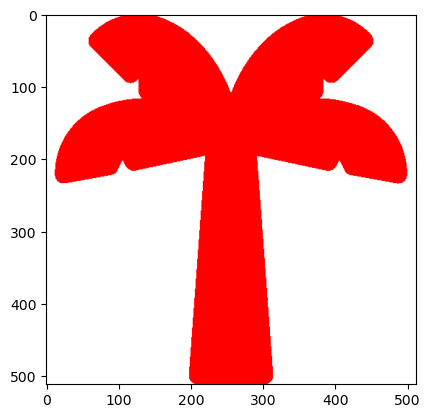

In [128]:
img_copy = np.copy(img)
for i in range(img_copy.shape[0]):
    for j in range(img_copy.shape[1]):
        if not(img_copy[i][j] == 255).all():
            img_copy[i][j] = [255, 0, 0]

plt.imshow(img_copy)

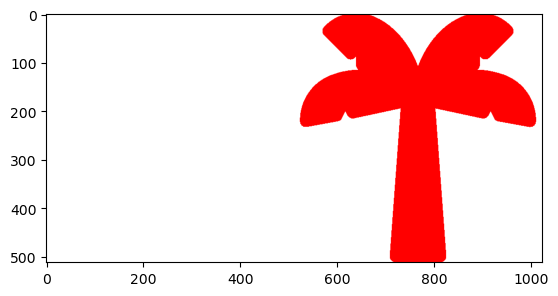

In [129]:
img_copy_2 = np.concatenate((np.zeros_like(img_copy) + 255, img_copy), axis=1)
plt.imshow(img_copy_2)

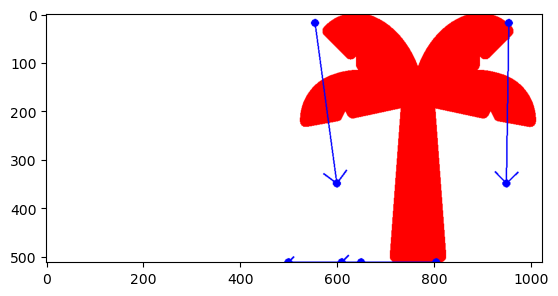

In [142]:
img_copy = np.copy(img_copy_2)

height, width = img_copy.shape[:2]
pts1 = [
    [650, height],
    [555, 20],
    [805, height],
    [955, 20]
]

pts2 = [
    [500, height],
    [600, 350],
    [610, height],
    [950, 350]
]

WHITE = (0,0, 255)
for p1, p2 in zip(pts1, pts2):
    cv.circle(img_copy, center=p1, radius=5, color=WHITE, thickness=5)
    cv.circle(img_copy, center=p2, radius=5, color=WHITE, thickness=5)
    cv.arrowedLine(img_copy, p1, p2, color=WHITE, thickness=2)

plt.imshow(img_copy, cmap='gray')

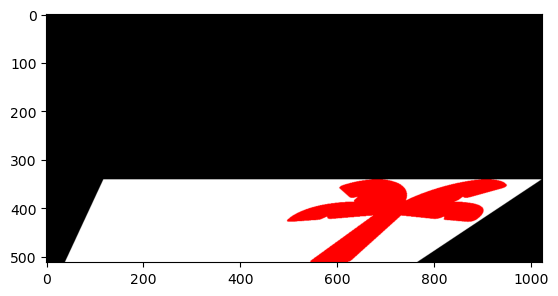

In [153]:
M = cv.getPerspectiveTransform(np.float32(pts1), np.float32(pts2))
img_res = cv.warpPerspective(img_copy_2, M, (width, height))
plt.imshow(img_res, cmap='gray')

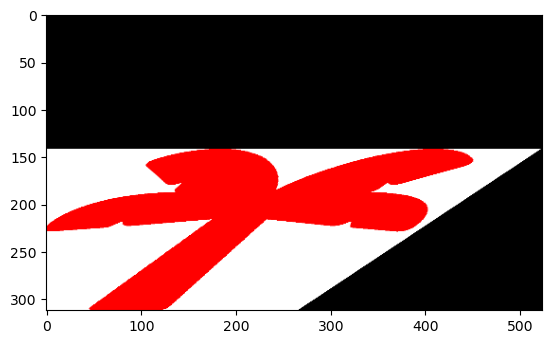

In [154]:
img_res = img_res[200:,500:]
plt.imshow(img_res)

In [155]:
img_res.shape

(312, 524, 3)

(512, 1024, 3)


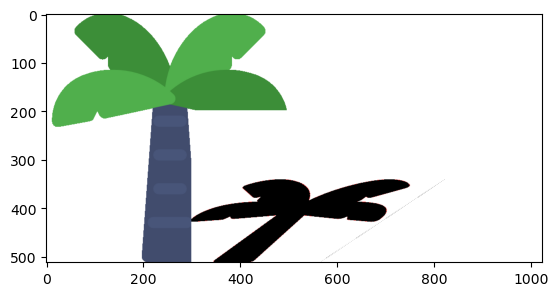

In [161]:
whole_result = np.concatenate((img, np.zeros_like(img) + 255), axis=1)
height, width = whole_result.shape[:2]
print(whole_result.shape)
whole_result[height-img_res.shape[0]:, 300:300+img_res.shape[1]] = img_res
for i in range(whole_result.shape[0]):
    for j in range(whole_result.shape[1]):
        if (whole_result[i][j] == 0).all():
            whole_result[i][j] = [255, 255, 255]
        elif whole_result[i][j][0] == 255 and whole_result[i][j][1] == 0 and whole_result[i][j][2] == 0:
            whole_result[i][j] = [0, 0, 0]
            
plt.imshow(whole_result)